In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
data.drop('Id', axis = 1, inplace = True)

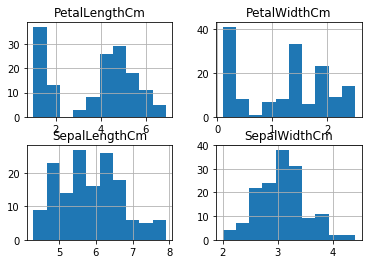

In [5]:
data.hist()
plt.show()

SepalLengthCm       AxesSubplot(0.125,0.536818;0.352273x0.343182)
SepalWidthCm     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
PetalLengthCm          AxesSubplot(0.125,0.125;0.352273x0.343182)
PetalWidthCm        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

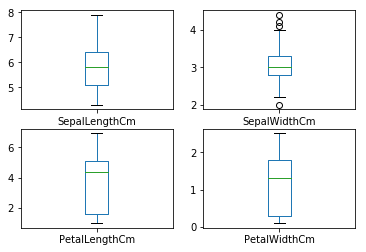

In [6]:
data.plot(kind ='box', subplots = True, layout = (2,2), sharex = False, sharey = False)

In [7]:
x = data.iloc[:, 0:4].values
y = data.iloc[:, 4].values

In [8]:
# split the data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.25, random_state = 0)

C:\Users\Alekhya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [9]:
# svm 
from sklearn.svm import SVC 
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
# predict 
y_pred = classifier.predict(x_test)

In [11]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix 
cm =  confusion_matrix(y_test, y_pred)
cm

array([[38,  0,  0],
       [ 0, 36,  1],
       [ 0,  0, 38]], dtype=int64)

In [12]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [13]:
best_accuracy

0.9459459459459459

In [15]:
best_parameters

{'C': 10, 'kernel': 'linear'}